# Web scrapping cz. 1

## Podstawy

Do pobierania danych ze stron będą potrzebne 3 moduły: <br>
pip install beautifulsoup4<br>
pip install lxml <br>
pip install requests <br><br>
<a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">Strona z dokumentacją Beautiful Soup</a><br><br>
Beautiful Soup supports the HTML parser included in Python’s standard library, but it also supports a number of third-party Python parsers.

<table class="docutils align-default">
<colgroup>
<col style="width: 18%" />
<col style="width: 35%" />
<col style="width: 26%" />
<col style="width: 21%" />
</colgroup>
<tbody>
<tr class="row-odd"><td><p>Parser</p></td>
<td><p>Typical usage</p></td>
<td><p>Advantages</p></td>
<td><p>Disadvantages</p></td>
</tr>
<tr class="row-even"><td><p>Python’s html.parser</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">BeautifulSoup(markup,</span> <span class="pre">&quot;html.parser&quot;)</span></code></p></td>
<td><ul class="simple">
<li><p>Batteries included</p></li>
<li><p>Decent speed</p></li>
<li><p>Lenient (As of Python 2.7.3
and 3.2.)</p></li>
</ul>
</td>
<td><ul class="simple">
<li><p>Not as fast as lxml,
less lenient than
html5lib.</p></li>
</ul>
</td>
</tr>
<tr class="row-odd"><td><p>lxml’s HTML parser</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">BeautifulSoup(markup,</span> <span class="pre">&quot;lxml&quot;)</span></code></p></td>
<td><ul class="simple">
<li><p>Very fast</p></li>
<li><p>Lenient</p></li>
</ul>
</td>
<td><ul class="simple">
<li><p>External C dependency</p></li>
</ul>
</td>
</tr>
<tr class="row-even"><td><p>lxml’s XML parser</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">BeautifulSoup(markup,</span> <span class="pre">&quot;lxml-xml&quot;)</span></code>
<code class="docutils literal notranslate"><span class="pre">BeautifulSoup(markup,</span> <span class="pre">&quot;xml&quot;)</span></code></p></td>
<td><ul class="simple">
<li><p>Very fast</p></li>
<li><p>The only currently supported
XML parser</p></li>
</ul>
</td>
<td><ul class="simple">
<li><p>External C dependency</p></li>
</ul>
</td>
</tr>
<tr class="row-odd"><td><p>html5lib</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">BeautifulSoup(markup,</span> <span class="pre">&quot;html5lib&quot;)</span></code></p></td>
<td><ul class="simple">
<li><p>Extremely lenient</p></li>
<li><p>Parses pages the same way a
web browser does</p></li>
<li><p>Creates valid HTML5</p></li>
</ul>
</td>
<td><ul class="simple">
<li><p>Very slow</p></li>
<li><p>External Python
dependency</p></li>
</ul>
</td>
</tr>
</tbody>
</table>

In [1]:
from bs4 import BeautifulSoup
import requests

ModuleNotFoundError: No module named 'bs4'

In [ ]:
soup = BeautifulSoup('<b class="boldest">Extremely bold</b>', 'html.parser')
tag = soup.b
type(tag)

bs4.element.Tag

In [ ]:
css_soup = BeautifulSoup('<p class="body strikeout"></p>', 'html.parser')
css_soup.p['class']

['body', 'strikeout']

### Bardziej rozsądny uchwyt dostępu do pliku

In [ ]:
with open('data//index.html', 'r') as html_file:
    content = html_file.read()
    # html_file <- markup file object to scrap info, 'lxml' <- parser
    soup = BeautifulSoup(html_file, 'lxml')

In [ ]:
html_file = open('data//index.html', 'r')
# html_file <- file object to scrap info, 'lxml' <- parser
soup = BeautifulSoup(html_file, 'lxml')

_io.TextIOWrapper

Podgląd strony

In [ ]:
print(soup.prettify())


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" integrity="sha384-JcKb8q3iqJ61gNV9KGb8thSsNjpSL0n8PARn9HuZOnIxN0hoP+VmmDGMN5t9UJ0Z" rel="stylesheet"/>
  <title>
   My Courses
  </title>
 </head>
 <body>
  <h1>
   Hello, Start Learning!
  </h1>
  <div class="card" id="card-python-for-beginners">
   <div class="card-header">
    Python
   </div>
   <div class="card-body">
    <h5 class="card-title">
     Python for beginners
    </h5>
    <p class="card-text">
     Lorem ipsum, dolor sit amet consectetur adipisicing elit. Corrupti modi dicta quas alias labore dolorem nulla iusto accusantium! Ut dolores tempore ad, dicta rem illum qui itaque voluptatum quisquam nulla?
    </p>
    <a class="btn btn-primary" href="#">
     Start for 20$
    </a>
   </div>
  </div>
  <div c

## Wydobywanie konkretnych informacji z pliku

In [ ]:
tags = soup.find('h5')
vars(tags) # == tags.__dict__
# type(tags)


{'parser_class': bs4.BeautifulSoup,
 'name': 'h5',
 'namespace': None,
 'prefix': None,
 'known_xml': False,
 'attrs': {'class': ['card-title']},
 'contents': ['Python for beginners'],
 'parent': <div class="card-body">
 <h5 class="card-title">Python for beginners</h5>
 <p class="card-text">Lorem ipsum, dolor sit amet consectetur adipisicing elit. Corrupti modi dicta quas alias labore dolorem nulla iusto accusantium! Ut dolores tempore ad, dicta rem illum qui itaque voluptatum quisquam nulla?</p>
 <a class="btn btn-primary" href="#">Start for 20$</a>
 </div>,
 'previous_element': '\n',
 'next_element': 'Python for beginners',
 'next_sibling': '\n',
 'previous_sibling': '\n',
 'hidden': False,
 'can_be_empty_element': False,
 'cdata_list_attributes': {'*': ['class', 'accesskey', 'dropzone'],
  'a': ['rel', 'rev'],
  'link': ['rel', 'rev'],
  'td': ['headers'],
  'th': ['headers'],
  'form': ['accept-charset'],
  'object': ['archive'],
  'area': ['rel'],
  'icon': ['sizes'],
  'iframe': 

In [ ]:
tags = soup.find_all('h5')
tags
# type(tags[0])

[<h5 class="card-title">Python for beginners</h5>,
 <h5 class="card-title">Python Web Development</h5>,
 <h5 class="card-title">Python Machine Learning</h5>]

In [ ]:
[x.text for x in tags]

['Python for beginners', 'Python Web Development', 'Python Machine Learning']

### Filtrowanie znaczników po konkretnej klasie, id

In [ ]:
# Uwaga nazwa class to nazwa wbudowana w pythonie (nie można jej przypisać do zmiennej)
course_cards = soup.find_all('div', class_='card')
# [course for course in course_cards]
[course.h5.text for course in course_cards]


['Python for beginners', 'Python Web Development', 'Python Machine Learning']

In [ ]:
[course.a.text for course in course_cards]

['Start for 20$', 'Start for 50$', 'Start for 100$']

In [ ]:
[course.a.text.split()[-1] for course in course_cards]
# [course.a.text.split()[-1][0:2] for course in course_cards]
# [int(course.a.text.split()[-1][0:2]) for course in course_cards]

['20$', '50$', '100$']

## Pobieranie danych ze stron z wykorzystaniem requests

In [ ]:
r = requests.get('https://www.zarz.agh.edu.pl/')
# assert r.status_code == 200
r

<Response [200]>

In [ ]:
soup = BeautifulSoup(r.text ,'lxml')
info = soup.find_all('h2')
info

[<h2>Witamy na stronie Wydziału Zarządzania AGH</h2>,
 <h2>AKTUALNOŚCI</h2>,
 <h2 style="text-align: left;"><strong></strong></h2>,
 <h2 style="text-align: left;"><strong></strong></h2>,
 <h2 style="text-align: left;"><strong></strong></h2>,
 <h2 style="text-align: left;"><strong>W ramach cyklu „Szkolenia z Przemysłem” –  spotkanie z firmą Elettric80 sp. z o.o. </strong><strong><br/></strong></h2>,
 <h2 style="text-align: left;"><strong></strong></h2>,
 <h2 style="text-align: left;"><strong></strong></h2>,
 <h2 style="text-align: left;"><strong></strong></h2>,
 <h2 style="text-align: left;"><strong>„SZKOLENIA Z PRZEMYSŁEM” – cykl spotkań z przedstawicielami z przemysłu dla studentów Wydziału Zarządzania</strong><strong> <br/></strong></h2>,
 <h2 style="text-align: left;"><strong></strong></h2>,
 <h2 style="text-align: left;"><strong></strong></h2>,
 <h2 style="text-align: left;"><strong></strong></h2>,
 <h2 style="text-align: left;"><strong>Wirtualne Targi Pracy AGH – edycja jesienna 2

In [ ]:
# [paragraph.text for paragraph in info]
paragraphs = soup.find_all('p', style = "text-align: justify;")
paragraphs

[<p style="text-align: justify;">Szkolenia w ramach cyklu „Szkolenia z Przemysłem” są szansą i ofertą skierowaną do studentów AGH i nie są realizowane w ramach zajęć – jest to wyjątkowa okazja do nawiązania bezpośredniego kontaktu z daną firmą. W dniu 17 listopada 2021 r. w godz. 14.00-15.30 odbędzie się na Wydziale Zarządzania szkolenie nt. „Systemy Bezpieczeństwa (tzw. safety) w robotach autonomicznych LGV/AGV” prowadzone przez firmę Elettric80 sp. z o.o.</p>,
 <p style="text-align: justify;"></p>,
 <p style="text-align: justify;">10 listopada 2021 r. odbyło się spotkanie w ramach cyklu „Szkolenia z przemysłem” – tym razem z grupą Maspex Sp. z o.o. na temat <em>Procesu zarządzania i finansowania innowacji w Grupie Maspex Sp. z o.o.</em>   </p>,
 <p style="text-align: justify;"></p>,
 <p style="text-align: justify;">Centrum Karier AGH zaprasza do udziału w jesiennej edycji Targów Pracy AGH. Wydarzenie, które odbędzie się w dniach 16–18 listopada 2021 r. w formule wirtualnej, obejmie w

## Przykład gumtree

In [ ]:
# url='https://www.gumtree.pl/s-parking-i-garaz/malopolskie/v1c9071l3200003p1'
url='https://www.gumtree.pl/s-parking-i-garaz/malopolskie/v1c9071l3200003p1?fr=ownr'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')

In [ ]:
content = soup.find_all('div', class_='tileV1')
[z.span for z in content][0]



# \xa0 is actually non-breaking space in Latin1, here is utf-8
# [z.text.replace(u'\xa0', u' ') for z in content][0]

<span>MIEJSCE POSTOJOWE W GARAŻU PODZIEMNYM PRZY UL Francesco Nullo 32 Kraków. Dostępne od zaraz.                    </span>

In [ ]:
titles = soup.find_all('a', class_="href-link tile-title-text")
titles[1].text

'Wynajmę miejsce parkingowe w garażu podziemnym'

In [ ]:
prices = soup.find_all('span', class_='ad-price')
prices[0].text
# prices[0].text.strip()

'190 zł'

In [ ]:
import re
extracted_prices = [re.sub('[^0-9]', '', z.text) for z in prices]
extracted_prices[0:4]

['190', '200', '230', '290']

## Przykład z POST requestem

<a href="https://topex.ucsd.edu/cgi-bin/get_data.cgi">https://topex.ucsd.edu/cgi-bin/get_data.cgi</a>

In [ ]:
# <form action="get_data.cgi" method="post">
post_data = {
'north': 50.5,
'west': 20,
'east': 21,
'south': 49.5,
'mag': 1
}
response = requests.post('https://topex.ucsd.edu/cgi-bin/get_data.cgi', data=post_data, verify=False).text
type(response)

C:\Users\Admin\Envs\mlroad\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'topex.ucsd.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


str

In [ ]:
pattern = r'\s+'
# text_after = re.sub(regex_search_term, regex_replacement, text_before)
response = re.sub(pattern,',',response)

In [ ]:
data = response.split(',')
assert len(data) % 3 == 0 
data_dict = {"latitude": data[::3],
             "longitude": data[1::3],
             "height": data[2::3]}

In [ ]:
len(data_dict['latitude']), len(data_dict['longitude']), len(data_dict['height'])

(5734, 5734, 5734)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
df = pd.DataFrame(data_dict,dtype=np.float64)
df.dtypes



latitude     float64
longitude    float64
height       float64
dtype: object

In [ ]:
df.head()

,latitude,longitude,height
0,0.0083,50.5012,277.0
1,20.0250,50.5012,277.0
2,20.0417,50.5012,273.0
3,20.0583,50.5012,285.0
4,20.0750,50.5012,299.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   5734 non-null   float64
 1   longitude  5734 non-null   float64
 2   height     5734 non-null   float64
dtypes: float64(3)
memory usage: 134.5 KB


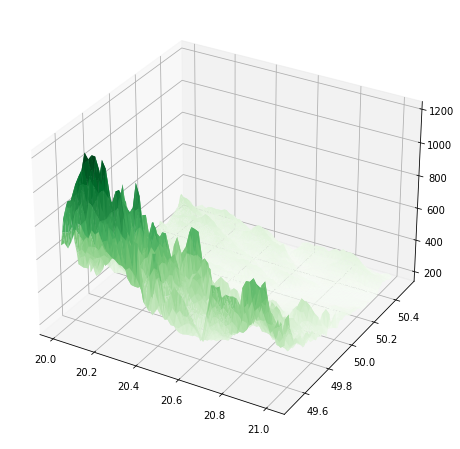

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
zdata = df["height"][1:]
xdata = df["latitude"][1:]
ydata = df["longitude"][1:]
ax.plot_trisurf(xdata, ydata, zdata,  cmap='Greens');

## Pobieranie obrazów 

In [ ]:
# http://books.toscrape.com/
html_page = requests.get('http://books.toscrape.com/')
soup = BeautifulSoup(html_page.content, 'html.parser')
warning = soup.find('div', class_="alert alert-warning")
# warning = soup.find('div', class_="image_container")

warning
book_container = warning.nextSibling.nextSibling
book_container

<div>
<ol class="row">
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_containe

In [ ]:
images = book_container.findAll('img')
example = images[1]
example

<img alt="Tipping the Velvet" class="thumbnail" src="media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"/>

In [ ]:
import shutil
url_base = "http://books.toscrape.com/" #Originalna strona
url_ext = example.attrs['src'] #src adres obrazka
full_url = url_base + url_ext #łączenie adresów
r = requests.get(full_url, stream=True) 
assert r.status_code == 200                    
with open("book1.jpg", 'wb') as f: 
    r.raw.decode_content = True
    shutil.copyfileobj(r.raw, f)

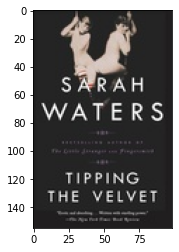

In [ ]:
import matplotlib.image as mpim
img = mpim.imread('book1.jpg')
imgplot = plt.imshow(img)
plt.show()